In [98]:
import json
from tqdm import tqdm
import pandas as pd
import os

In [14]:
with open('../data/testing/01001.topojson', 'r') as f:
    j = json.load(f)

In [15]:
j.keys()

dict_keys(['type', 'objects', 'arcs', 'bbox'])

In [16]:
j['objects']

{'01001': {'type': 'GeometryCollection',
  'geometries': [{'type': 'Polygon',
    'arcs': [[0, 1, 2, 3, 4, 5, 6]],
    'properties': {'GEOID20': '010010205033012'}},
   {'type': 'Polygon',
    'arcs': [[7, 8, 9, 10]],
    'properties': {'GEOID20': '010010206001009'}},
   {'type': 'Polygon',
    'arcs': [[11, 12, 13, 14, 15]],
    'properties': {'GEOID20': '010010206003005'}},
   {'type': 'Polygon',
    'arcs': [[16, 17, 18, 19, 20, 21, 22]],
    'properties': {'GEOID20': '010010207002006'}},
   {'type': 'Polygon',
    'arcs': [[23, 24, 25, 26]],
    'properties': {'GEOID20': '010010207002008'}},
   {'type': 'Polygon',
    'arcs': [[27, 28, 29, 30, 31]],
    'properties': {'GEOID20': '010010208012016'}},
   {'type': 'Polygon',
    'arcs': [[32, 33, 34]],
    'properties': {'GEOID20': '010010206003013'}},
   {'type': 'Polygon',
    'arcs': [[35, 36, 37, 38, 39, 40]],
    'properties': {'GEOID20': '010010206002006'}},
   {'type': 'Polygon',
    'arcs': [[41, 42, 43, 44, 45, 46, 47]],
    

# Do arc indices ever overlap?

In [17]:
s = set()
pbar = tqdm(j['objects']['01001']['geometries'])
for obj in pbar:
    prev_len = len(s)
    s |= set(obj['arcs'][0])
    pbar.set_description('%s --> %s' % (prev_len, len(s)))
    assert len(s) > prev_len

7542 --> 7553: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1512/1512 [00:02<00:00, 732.40it/s]


# Take a county level topojson, versus a block group level topojson, and compare

In [18]:
import geopandas as gpd

In [22]:
df = gpd.read_file('../data/testing/01001.topojson')
df

id          GEOID20                                           geometry
0    NaN  010010205033012  POLYGON ((-86.43147 32.47125, -86.43120 32.471...
1    NaN  010010206001009  POLYGON ((-86.49678 32.43825, -86.49557 32.439...
2    NaN  010010206003005  POLYGON ((-86.48140 32.45598, -86.48071 32.455...
3    NaN  010010207002006  POLYGON ((-86.46499 32.45638, -86.46486 32.457...
4    NaN  010010207002008  POLYGON ((-86.46751 32.45783, -86.46737 32.459...
...   ..              ...                                                ...
1507 NaN  010010211002026  POLYGON ((-86.65551 32.42958, -86.65515 32.429...
1508 NaN  010010208012003  POLYGON ((-86.50567 32.45949, -86.50529 32.459...
1509 NaN  010010208013029  POLYGON ((-86.50797 32.45913, -86.50809 32.459...
1510 NaN  010010201002016  POLYGON ((-86.50012 32.48730, -86.49968 32.487...
1511 NaN  010010201002004  POLYGON ((-86.49551 32.49393, -86.49519 32.494...

[1512 rows x 3 columns]

In [24]:
import random

In [30]:
df['value'] = df['geometry'].apply(lambda x: random.randint(0,100))
df

/Users/alanwang/Documents/GitHub/shapes/.venv/lib/python3.10/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


id          GEOID20                                           geometry  \
0    NaN  010010205033012  POLYGON ((-86.43147 32.47125, -86.43120 32.471...   
1    NaN  010010206001009  POLYGON ((-86.49678 32.43825, -86.49557 32.439...   
2    NaN  010010206003005  POLYGON ((-86.48140 32.45598, -86.48071 32.455...   
3    NaN  010010207002006  POLYGON ((-86.46499 32.45638, -86.46486 32.457...   
4    NaN  010010207002008  POLYGON ((-86.46751 32.45783, -86.46737 32.459...   
...   ..              ...                                                ...   
1507 NaN  010010211002026  POLYGON ((-86.65551 32.42958, -86.65515 32.429...   
1508 NaN  010010208012003  POLYGON ((-86.50567 32.45949, -86.50529 32.459...   
1509 NaN  010010208013029  POLYGON ((-86.50797 32.45913, -86.50809 32.459...   
1510 NaN  010010201002016  POLYGON ((-86.50012 32.48730, -86.49968 32.487...   
1511 NaN  010010201002004  POLYGON ((-86.49551 32.49393, -86.49519 32.494...   

      value  
0        69  
1        66  
2        16  
3        65  
4        76  
...     ...  
1507     31  
1508     42  
1509     22  
1510     24  
1511     59  

[1512 rows x 4 columns]

/Users/alanwang/Documents/GitHub/shapes/.venv/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

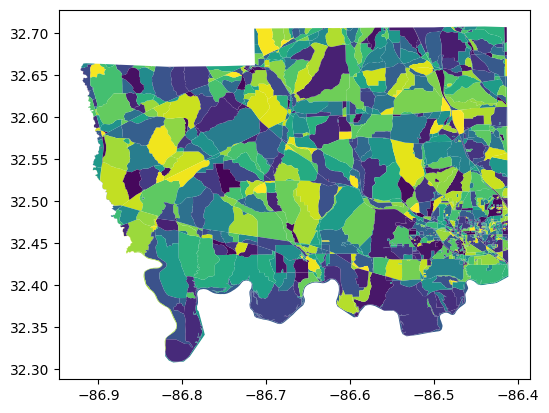

In [31]:
df.plot(column='value')

In [39]:
from shapely.ops import unary_union
cdf = gpd.GeoDataFrame(pd.DataFrame({'geometry': gpd.GeoSeries(unary_union(df['geometry']))}))
cdf

geometry
0  POLYGON ((-86.78886 32.31784, -86.78929 32.317...

<Axes: >

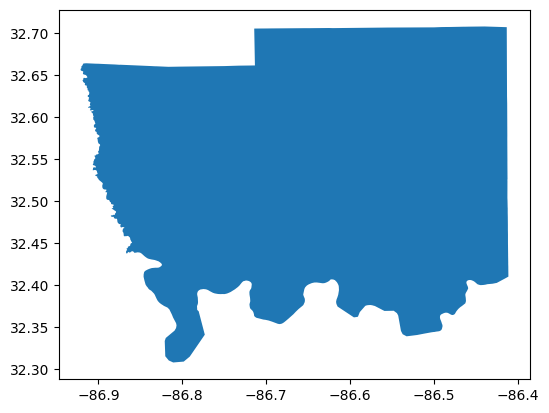

In [40]:
cdf.plot()

In [42]:
cdf.to_file('../data/testing/01001_merged.geojson', index=False)

In [43]:
with open('../data/testing/01001_merged.topojson', 'r') as f:
    j2 = json.load(f)
j2

{'type': 'Topology',
 'objects': {'01001_merged': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon', 'arcs': [[0]]}]}},
 'arcs': [[[-86.78886, 32.317838],
   [-86.78929, 32.317211],
   [-86.789953, 32.316245],
   [-86.790616, 32.315278],
   [-86.791073, 32.314611],
   [-86.791632, 32.314147],
   [-86.792363, 32.31354],
   [-86.793094, 32.312932],
   [-86.7943, 32.311929],
   [-86.795506, 32.310927],
   [-86.798268, 32.308632],
   [-86.801146, 32.308389],
   [-86.802047, 32.308313],
   [-86.802948, 32.308237],
   [-86.803516, 32.308189],
   [-86.804085, 32.308141],
   [-86.806254, 32.307958],
   [-86.808424, 32.307775],
   [-86.809613, 32.307675],
   [-86.810802, 32.307574],
   [-86.811559, 32.307916],
   [-86.812317, 32.308258],
   [-86.8124, 32.308296],
   [-86.812924, 32.308541],
   [-86.813098, 32.308622],
   [-86.813591, 32.308843],
   [-86.813676, 32.308881],
   [-86.816107, 32.30997],
   [-86.818374, 32.312711],
   [-86.818446, 32.312798],
   [-86.818778, 32.313

In [48]:
s = set()
pbar = tqdm(j2['objects']['01001_merged']['geometries'])
for obj in pbar:
    prev_len = len(s)
    s |= set(obj['arcs'][0])
    pbar.set_description('%s --> %s' % (prev_len, len(s)))
    assert len(s) > prev_len

0 --> 1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 524.68it/s]


# How much of the coordinates overlap?

In [57]:
points = set()
for arc in j['arcs']:
    for pt in arc:
        points |= set(pt)
print(len(points))

157352


In [58]:
points2 = set()
for arc in j2['arcs']:
    for pt in arc:
        points2 |= set(pt)
print(len(points2))

4182


In [60]:
len(points.intersection(points2))

4182

# How about, we create a topojson for census tracts (i.e., 11 character-length geoid) and compare the results?

In [63]:
df

id          GEOID20                                           geometry  \
0    NaN  010010205033012  POLYGON ((-86.43147 32.47125, -86.43120 32.471...   
1    NaN  010010206001009  POLYGON ((-86.49678 32.43825, -86.49557 32.439...   
2    NaN  010010206003005  POLYGON ((-86.48140 32.45598, -86.48071 32.455...   
3    NaN  010010207002006  POLYGON ((-86.46499 32.45638, -86.46486 32.457...   
4    NaN  010010207002008  POLYGON ((-86.46751 32.45783, -86.46737 32.459...   
...   ..              ...                                                ...   
1507 NaN  010010211002026  POLYGON ((-86.65551 32.42958, -86.65515 32.429...   
1508 NaN  010010208012003  POLYGON ((-86.50567 32.45949, -86.50529 32.459...   
1509 NaN  010010208013029  POLYGON ((-86.50797 32.45913, -86.50809 32.459...   
1510 NaN  010010201002016  POLYGON ((-86.50012 32.48730, -86.49968 32.487...   
1511 NaN  010010201002004  POLYGON ((-86.49551 32.49393, -86.49519 32.494...   

      value  
0        69  
1        66  
2        16  
3        65  
4        76  
...     ...  
1507     31  
1508     42  
1509     22  
1510     24  
1511     59  

[1512 rows x 4 columns]

In [81]:
dfs = []

for ct in tqdm(df['GEOID20'].str[:11].unique()):
    pdf = df[df['GEOID20'].str[:len(ct)] == ct]
    # print(unary_union(pdf['geometry']))
    ctdf = gpd.GeoDataFrame(pd.DataFrame({'geoid': ct, 'geometry': gpd.GeoSeries(unary_union(pdf['geometry']))}))
    dfs.append(ctdf)

mdf = pd.concat(dfs)
mdf

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 22.46it/s]


geoid                                           geometry
0  01001020503  POLYGON ((-86.42474 32.46533, -86.42494 32.465...
0  01001020600  POLYGON ((-86.48041 32.43097, -86.48127 32.430...
0  01001020700  POLYGON ((-86.45624 32.40846, -86.45603 32.409...
0  01001020801  POLYGON ((-86.58941 32.37045, -86.58946 32.371...
0  01001021100  POLYGON ((-86.78641 32.32141, -86.78842 32.318...
0  01001021000  POLYGON ((-86.75004 32.55464, -86.75115 32.554...
0  01001020902  POLYGON ((-86.60311 32.57422, -86.60379 32.574...
0  01001020803  POLYGON ((-86.53937 32.48650, -86.54233 32.488...
0  01001020805  POLYGON ((-86.44506 32.53309, -86.44542 32.533...
0  01001020501  POLYGON ((-86.43141 32.44248, -86.43194 32.442...
0  01001020400  POLYGON ((-86.44980 32.45861, -86.44991 32.458...
0  01001020901  POLYGON ((-86.47952 32.60890, -86.47957 32.609...
0  01001020100  POLYGON ((-86.49824 32.46485, -86.49831 32.464...
0  01001020804  POLYGON ((-86.47394 32.48920, -86.47412 32.489...
0  01001020502  POLYGON ((-86.43412 32.46046, -86.43412 32.460...
0  01001020300  POLYGON ((-86.46718 32.46088, -86.46710 32.461...
0  01001020200  POLYGON ((-86.47557 32.45997, -86.47561 32.460...

In [87]:
bgdf = df.copy()
bgdf = bgdf.rename(columns={'GEOID20': 'geoid'})
bgdf = bgdf.reindex(['geoid', 'geometry'], axis=1)
bgdf

geoid                                           geometry
0     010010205033012  POLYGON ((-86.43147 32.47125, -86.43120 32.471...
1     010010206001009  POLYGON ((-86.49678 32.43825, -86.49557 32.439...
2     010010206003005  POLYGON ((-86.48140 32.45598, -86.48071 32.455...
3     010010207002006  POLYGON ((-86.46499 32.45638, -86.46486 32.457...
4     010010207002008  POLYGON ((-86.46751 32.45783, -86.46737 32.459...
...               ...                                                ...
1507  010010211002026  POLYGON ((-86.65551 32.42958, -86.65515 32.429...
1508  010010208012003  POLYGON ((-86.50567 32.45949, -86.50529 32.459...
1509  010010208013029  POLYGON ((-86.50797 32.45913, -86.50809 32.459...
1510  010010201002016  POLYGON ((-86.50012 32.48730, -86.49968 32.487...
1511  010010201002004  POLYGON ((-86.49551 32.49393, -86.49519 32.494...

[1512 rows x 2 columns]

In [88]:
mdf = pd.concat([bgdf, mdf])
mdf

geoid                                           geometry
0   010010205033012  POLYGON ((-86.43147 32.47125, -86.43120 32.471...
1   010010206001009  POLYGON ((-86.49678 32.43825, -86.49557 32.439...
2   010010206003005  POLYGON ((-86.48140 32.45598, -86.48071 32.455...
3   010010207002006  POLYGON ((-86.46499 32.45638, -86.46486 32.457...
4   010010207002008  POLYGON ((-86.46751 32.45783, -86.46737 32.459...
..              ...                                                ...
0       01001020100  POLYGON ((-86.49824 32.46485, -86.49831 32.464...
0       01001020804  POLYGON ((-86.47394 32.48920, -86.47412 32.489...
0       01001020502  POLYGON ((-86.43412 32.46046, -86.43412 32.460...
0       01001020300  POLYGON ((-86.46718 32.46088, -86.46710 32.461...
0       01001020200  POLYGON ((-86.47557 32.45997, -86.47561 32.460...

[1529 rows x 2 columns]

In [89]:
mdf.to_file('../data/testing/01001_bgct.geojson')

In [90]:
# os.system('geo2topo 01001_bgct.geojson > 01001_bgct.topojson')

# Can I remove other geometries and use the same arcs?

In [91]:
with open('../data/testing/01001_bgct.topojson', 'r') as f:
    j3 = json.load(f)
j3

{'type': 'Topology',
 'objects': {'01001_bgct': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[0, 1, 2, 3, 4, 5, 6]],
     'properties': {'geoid': '010010205033012'}},
    {'type': 'Polygon',
     'arcs': [[7, 8, 9, 10]],
     'properties': {'geoid': '010010206001009'}},
    {'type': 'Polygon',
     'arcs': [[11, 12, 13, 14, 15]],
     'properties': {'geoid': '010010206003005'}},
    {'type': 'Polygon',
     'arcs': [[16, 17, 18, 19, 20, 21, 22]],
     'properties': {'geoid': '010010207002006'}},
    {'type': 'Polygon',
     'arcs': [[23, 24, 25, 26]],
     'properties': {'geoid': '010010207002008'}},
    {'type': 'Polygon',
     'arcs': [[27, 28, 29, 30, 31]],
     'properties': {'geoid': '010010208012016'}},
    {'type': 'Polygon',
     'arcs': [[32, 33, 34]],
     'properties': {'geoid': '010010206003013'}},
    {'type': 'Polygon',
     'arcs': [[35, 36, 37, 38, 39, 40]],
     'properties': {'geoid': '010010206002006'}},
    {'type': 'Polygon',
 

In [93]:
len(j3['objects']['01001_bgct']['geometries'])

1529

## Remove all geoids, except for the largerst one

In [96]:
test_remainder = [v for v in j3['objects']['01001_bgct']['geometries'] if v['properties']['geoid']=='01001020902']
j3['objects']['01001_bgct']['geometries'] = test_remainder
j3

{'type': 'Topology',
 'objects': {'01001_bgct': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[-2424,
       149,
       -2423,
       151,
       145,
       3280,
       -2511,
       2694,
       2487,
       -626,
       2488,
       -1396,
       3196,
       3197,
       -2344,
       -1301,
       3064,
       3073,
       3506,
       3510,
       3512,
       3515,
       3060,
       2594,
       3769,
       3680,
       3516,
       3385,
       3493,
       -1774,
       -1773,
       -1772,
       -2589,
       -2588,
       -2594,
       -2584,
       -2566,
       1686,
       3293,
       94,
       95,
       -591,
       1677,
       -583,
       -582,
       2774,
       3000,
       -157,
       -2048,
       -2047,
       -3005,
       -825,
       -912,
       -823,
       -822,
       -3082,
       2696,
       2697,
       3198,
       3199]],
     'properties': {'geoid': '01001020902'}}]}},
 'arcs': [[[-86.431465, 32.471255

## Try removing unecessary arcs and see if the file size drops

In [105]:
req_arcs = [abs(i) for i in test_remainder[0]['arcs'][0]]

for i in range(len(j3['arcs'])):
    if not i in req_arcs:
        j3['arcs'][i] = [] # empty the values for now

In [106]:
j3

{'type': 'Topology',
 'objects': {'01001_bgct': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[-2424,
       149,
       -2423,
       151,
       145,
       3280,
       -2511,
       2694,
       2487,
       -626,
       2488,
       -1396,
       3196,
       3197,
       -2344,
       -1301,
       3064,
       3073,
       3506,
       3510,
       3512,
       3515,
       3060,
       2594,
       3769,
       3680,
       3516,
       3385,
       3493,
       -1774,
       -1773,
       -1772,
       -2589,
       -2588,
       -2594,
       -2584,
       -2566,
       1686,
       3293,
       94,
       95,
       -591,
       1677,
       -583,
       -582,
       2774,
       3000,
       -157,
       -2048,
       -2047,
       -3005,
       -825,
       -912,
       -823,
       -822,
       -3082,
       2696,
       2697,
       3198,
       3199]],
     'properties': {'geoid': '01001020902'}}]}},
 'arcs': [[],
  [],
  [],
  [],
 

In [107]:
with open('../data/testing/01001_bgct_mod.topojson', 'w') as f:
    json.dump(j3, f)
os.path.isfile('../data/testing/01001_bgct_mod.topojson')

True

<Axes: >

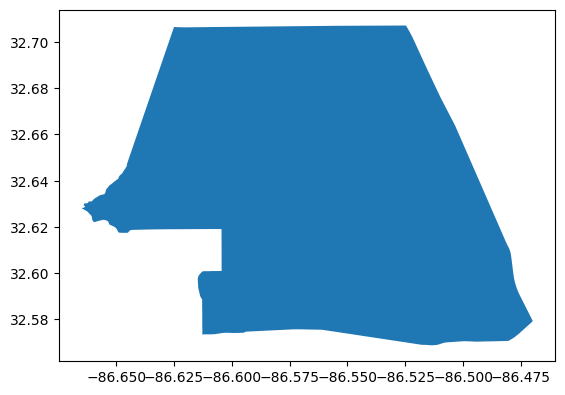

In [108]:
test_df = gpd.read_file('../data/testing/01001_bgct_mod.topojson')
test_df.plot()

# Merge and split geographies?
## Then, with the global arcs, create a list with non-related arcs empty and export them as partial topojsons, papojson
## Check what the final sizes are

In [110]:
import pathlib

In [169]:
va_files = pathlib.Path('../data/').glob('51*.topojson')
va_files = sorted(va_files)

In [170]:
len(va_files)

133

In [172]:
dfs = []
pbar = tqdm(va_files)
for f in pbar:
    pbar.set_description('Updating: %s' % f)
    df = gpd.read_file(f)
    dfs.append(df)
    
mdf = pd.concat(dfs)
mdf

Updating: ../data/51840.topojson: 100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [01:11<00:00,  1.86it/s]


id          GEOID20                                           geometry
0   NaN  510010906002040  POLYGON ((-75.75656 37.75897, -75.75649 37.758...
1   NaN  510010906002055  POLYGON ((-75.80700 37.74641, -75.80645 37.746...
2   NaN  510010906002048  POLYGON ((-75.78037 37.75350, -75.78171 37.753...
3   NaN  510010906004049  POLYGON ((-75.76353 37.69156, -75.76318 37.692...
4   NaN  510010904011019  POLYGON ((-75.53708 37.83070, -75.53612 37.829...
..   ..              ...                                                ...
505 NaN  518400003021007  POLYGON ((-78.18182 39.15488, -78.18179 39.154...
506 NaN  518400003023000  POLYGON ((-78.18283 39.15199, -78.18234 39.152...
507 NaN  518400002022014  POLYGON ((-78.17573 39.18260, -78.17497 39.182...
508 NaN  518400003023009  POLYGON ((-78.18528 39.15041, -78.18500 39.150...
509 NaN  518400003024007  POLYGON ((-78.17554 39.14721, -78.17535 39.147...

[163491 rows x 3 columns]

In [173]:
del mdf['id']
mdf

GEOID20                                           geometry
0    510010906002040  POLYGON ((-75.75656 37.75897, -75.75649 37.758...
1    510010906002055  POLYGON ((-75.80700 37.74641, -75.80645 37.746...
2    510010906002048  POLYGON ((-75.78037 37.75350, -75.78171 37.753...
3    510010906004049  POLYGON ((-75.76353 37.69156, -75.76318 37.692...
4    510010904011019  POLYGON ((-75.53708 37.83070, -75.53612 37.829...
..               ...                                                ...
505  518400003021007  POLYGON ((-78.18182 39.15488, -78.18179 39.154...
506  518400003023000  POLYGON ((-78.18283 39.15199, -78.18234 39.152...
507  518400002022014  POLYGON ((-78.17573 39.18260, -78.17497 39.182...
508  518400003023009  POLYGON ((-78.18528 39.15041, -78.18500 39.150...
509  518400003024007  POLYGON ((-78.17554 39.14721, -78.17535 39.147...

[163491 rows x 2 columns]

In [175]:
## First, combine all geometries in Virginia and the different layers and export it

In [176]:
length_list = [2, 5, 11, 12]
dfs = []
for leng in length_list:
    for layer in tqdm(mdf['GEOID20'].str[:leng].unique()):
        pdf = mdf[mdf['GEOID20'].str[:len(layer)] == layer]
        # print(unary_union(pdf['geometry']))
        ldf = gpd.GeoDataFrame(pd.DataFrame({'geoid': layer, 'geometry': gpd.GeoSeries(unary_union(pdf['geometry']))}))
        dfs.append(ldf)
    
mdf = pd.concat(dfs)
mdf

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5963/5963 [08:15<00:00, 12.04it/s]


geoid                                           geometry
0             51  POLYGON ((-82.93001 36.59367, -82.93293 36.593...
0          51001  POLYGON ((-75.83638 37.55496, -75.83702 37.555...
0          51003  POLYGON ((-78.75928 37.91248, -78.75956 37.912...
0          51005  POLYGON ((-80.16166 37.60398, -80.16199 37.604...
0          51007  POLYGON ((-78.12827 37.27205, -78.12854 37.272...
..           ...                                                ...
0   518400002022  POLYGON ((-78.17148 39.17739, -78.17001 39.177...
0   518400002013  POLYGON ((-78.16504 39.19666, -78.16501 39.196...
0   518400002025  POLYGON ((-78.18973 39.16655, -78.18996 39.165...
0   518400001022  POLYGON ((-78.15765 39.18896, -78.15810 39.189...
0   518400002026  POLYGON ((-78.18354 39.16316, -78.18423 39.162...

[8295 rows x 2 columns]

In [178]:
mdf.to_file('../data/testing/va_combined.geojson')
os.path.isfile('../data/testing/va_combined.geojson')

True

In [179]:
size_reduction = (128.7-30.9)/128.7
size_reduction

0.7599067599067598

In [183]:
with open('../data/testing/va_combined.topojson', 'r') as f:
    j4 = json.load(f)
j4

{'type': 'Topology',
 'objects': {'va_combined': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[0,
       1,
       2,
       3,
       4,
       5,
       6,
       7,
       8,
       9,
       10,
       11,
       12,
       13,
       14,
       15,
       16,
       17,
       18,
       19,
       20,
       21,
       22,
       23,
       24,
       25,
       26,
       27,
       28,
       29,
       30,
       31,
       32,
       33,
       34,
       35,
       36,
       37,
       38,
       39,
       40,
       41,
       42,
       43,
       44,
       45,
       46,
       47,
       48,
       49,
       50,
       51,
       52,
       53,
       54,
       55,
       56,
       57,
       58,
       59,
       60,
       61,
       62,
       63,
       64,
       65,
       66,
       67,
       68,
       69,
       70,
       71,
       72,
       73,
       74,
       75,
       76,
       77,
       78,
       79,
    

## How often are each "arc" utilized?

In [191]:
from collections import Counter

In [207]:
c = Counter()
for geo in tqdm(j4['objects']['va_combined']['geometries']):
    li=geo['arcs']
    flatten=lambda l: sum(map(flatten,l),[]) if isinstance(l,list) else [l]
    c += Counter(flatten(li))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8295/8295 [00:07<00:00, 1084.80it/s]


In [208]:
c

Counter({0: 4,
         1: 4,
         2: 4,
         3: 4,
         4: 4,
         5: 4,
         6: 4,
         7: 4,
         8: 4,
         9: 4,
         10: 4,
         11: 4,
         12: 4,
         13: 4,
         14: 4,
         15: 4,
         16: 4,
         17: 4,
         18: 4,
         19: 4,
         20: 4,
         21: 4,
         22: 4,
         23: 4,
         24: 4,
         25: 4,
         26: 4,
         27: 4,
         28: 4,
         29: 4,
         30: 4,
         31: 4,
         32: 4,
         33: 4,
         34: 4,
         35: 4,
         36: 4,
         37: 4,
         38: 4,
         39: 4,
         40: 4,
         41: 4,
         42: 4,
         43: 4,
         44: 4,
         45: 4,
         46: 4,
         47: 4,
         48: 4,
         49: 4,
         50: 4,
         51: 4,
         52: 4,
         53: 4,
         54: 4,
         55: 4,
         56: 4,
         57: 4,
         58: 4,
         59: 4,
         60: 4,
         61: 4,
         62: 4,
  

In [209]:
max_count = 0
for key in c:
    if c[key] > max_count:
        max_count = c[key]
print(max_count)

4
